# Surrogate modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rcupd = {
    'figure.figsize': (5, 4),
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm',
    'font.size': 12,
}
plt.rcParams.update(rcupd)

In [3]:
data_files = [
    'inliers_hi_FR_hi_GS_160C.csv',
    'inliers_hi_FR_hi_GS_200C.csv',
    'inliers_hi_FR_lo_GS_160C.csv',
    'inliers_hi_FR_lo_GS_200C.csv',
    'inliers_lo_FR_hi_GS_100C.csv',
    'inliers_lo_FR_hi_GS_160C.csv',
    'inliers_lo_FR_lo_GS_100C.csv',
    'inliers_lo_FR_lo_GS_160C.csv'
]

# Convenience functions

In [4]:
def lin_coef_cept(mod):
    print(
        ' coeffs: ',
        mod.coef_, '\n',
        'intercept: ',
        mod.intercept_
    )

In [5]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

def mod_metrics(mod, X_test, y_test):
    y_pred = mod.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(
        ' R2: ', r2, '\n',
        'RMSE: ', rmse, '\n',
        'MAE: ', mae
    )

In [6]:
def pred_vs_actual(mod, X_test, y_test, tt):
    y_pred = mod.predict(X_test)

    plt.figure(figsize=(5,4))
    plt.rcParams.update({'font.size': 16})

    plt.scatter(y_test, y_pred, s=15)
    plt.plot(list(range(100)), list(range(100)),
             color='k', ls='--', label='y=x')

    plt.title(tt)
    plt.xlabel(r'Test data (swelling \%)')
    plt.ylabel(r'Surrogate pred. (swelling \%)')
    plt.legend()
    plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def load_data(fileName):
    jar = pd.read_csv(fileName)

    X = jar.iloc[:, :3].to_numpy()
    y = jar.iloc[:, -1].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=19
    )

    xscaler = MinMaxScaler()
    xscaler.fit(X_train)

    X_train = xscaler.transform(X_train)
    X_test = xscaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Linear (OLS)

In [8]:
from sklearn import linear_model

 coeffs:  [ 36.59473373 -13.42232001 -14.54036548] 
 intercept:  49.928789455244384
 R2:  0.9537169599346873 
 RMSE:  2.6515720624037926 
 MAE:  1.9721333466335158


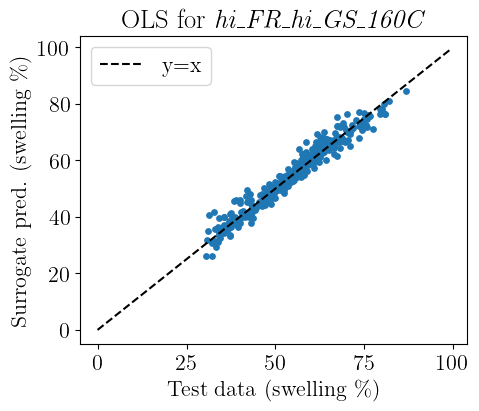

 coeffs:  [ 43.84885347 -15.56078614 -16.74631574] 
 intercept:  57.53795514996914
 R2:  0.9630155999051415 
 RMSE:  2.752715348193921 
 MAE:  2.0960904122238353


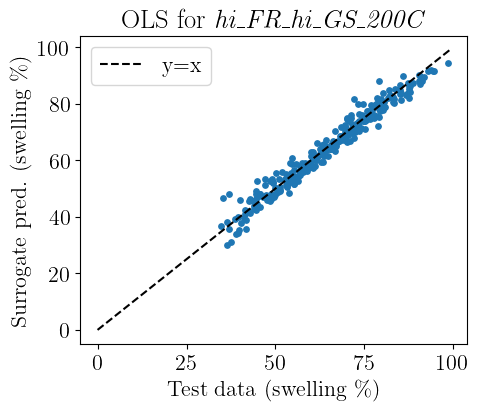

 coeffs:  [ 76.83606008 -27.64610622 -29.39626014] 
 intercept:  61.5876563926473
 R2:  0.9318836894105456 
 RMSE:  6.734984061122688 
 MAE:  5.148941832397618


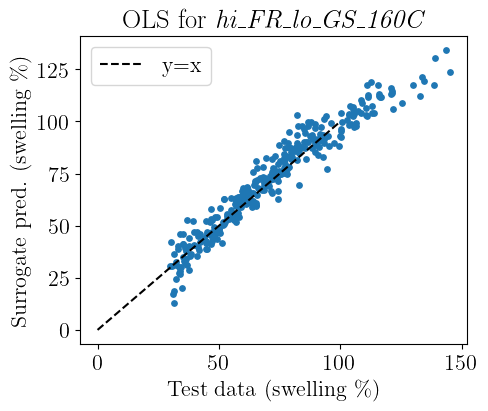

 coeffs:  [ 99.05686423 -36.57453228 -38.07885854] 
 intercept:  78.15486337750403
 R2:  0.9408866068016503 
 RMSE:  8.091867234961002 
 MAE:  5.580200490739765


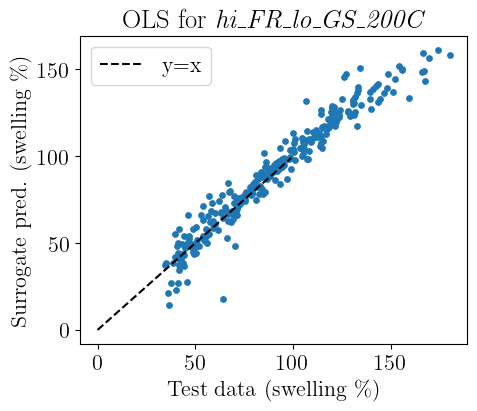

 coeffs:  [ 29.73488679 -10.28608932 -12.85955947] 
 intercept:  41.47668199190491
 R2:  0.9398700940819664 
 RMSE:  2.462670122508741 
 MAE:  1.9491250770908488


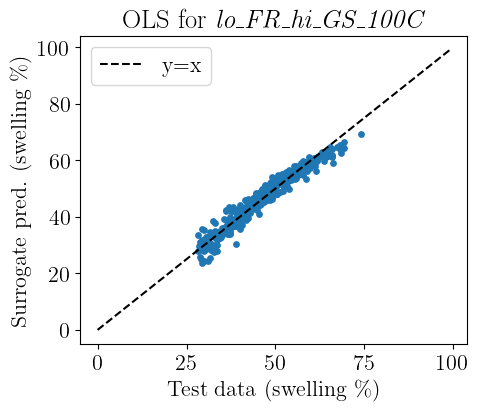

 coeffs:  [ 37.1632611  -13.36323367 -14.3004188 ] 
 intercept:  52.779097889108044
 R2:  0.9630867381485679 
 RMSE:  2.2638887225023687 
 MAE:  1.6767649000491582


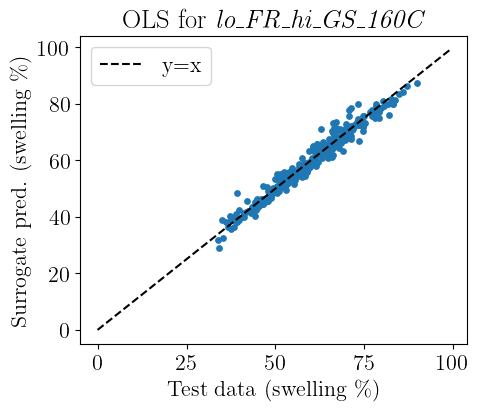

 coeffs:  [ 44.89036607 -16.36208187 -20.13509927] 
 intercept:  47.005545383905975
 R2:  0.906309312320989 
 RMSE:  4.641204990608566 
 MAE:  3.6205191533672116


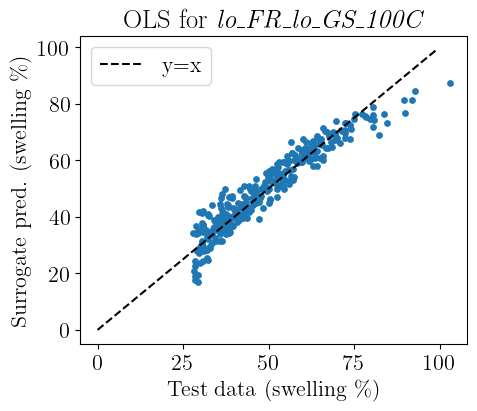

 coeffs:  [ 73.19918483 -26.67814066 -28.17310447] 
 intercept:  65.95017495930801
 R2:  0.9449474290499853 
 RMSE:  5.763196793589052 
 MAE:  4.421264274499744


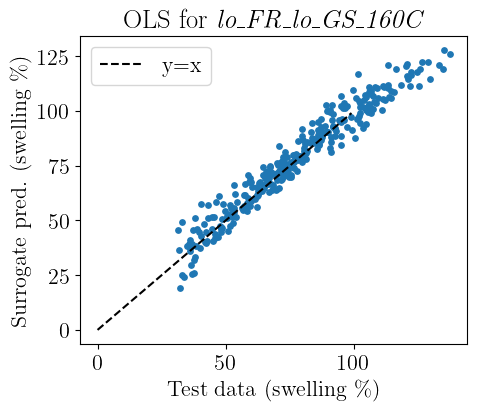

In [9]:
for f in data_files:
    X_train, X_test, y_train, y_test = load_data(f)
    
    reg_lin = linear_model.LinearRegression().fit(X_train, y_train)
    
    lin_coef_cept(reg_lin)
    mod_metrics(reg_lin, X_test, y_test)
    pred_vs_actual(reg_lin, X_test, y_test, r'OLS for \textit{' + f[8:-4] + '}')

# Lasso

 coeffs:  [ 35.36422192 -12.21462417 -13.34072511] 
 intercept:  49.36634773353518
 R2:  0.953499451014903 
 RMSE:  2.6577953415807345 
 MAE:  1.9500545039764545


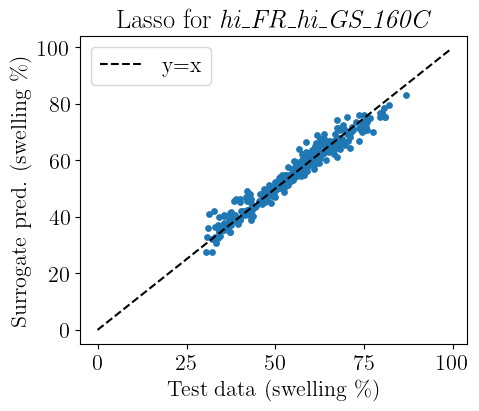

 coeffs:  [ 42.64748371 -14.36123288 -15.49260764] 
 intercept:  56.93204327328127
 R2:  0.9626639292994738 
 RMSE:  2.765771646857738 
 MAE:  2.0955900401493337


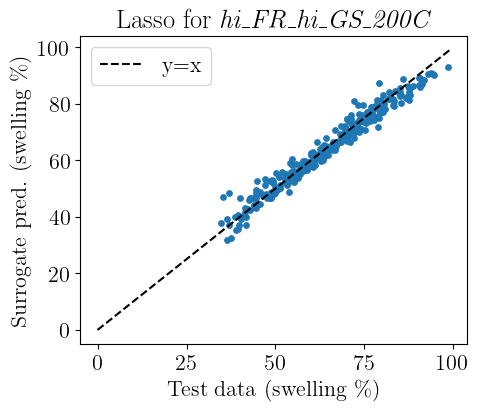

 coeffs:  [ 75.6590061  -26.46041405 -28.16936961] 
 intercept:  60.99371710549347
 R2:  0.9303274056157832 
 RMSE:  6.811488143868727 
 MAE:  5.192549297566105


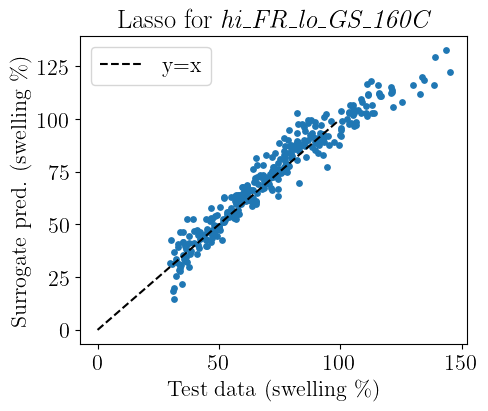

 coeffs:  [ 97.88696296 -35.37319327 -36.90160018] 
 intercept:  77.566813532257
 R2:  0.9411054941246514 
 RMSE:  8.076871903723713 
 MAE:  5.5847848498210615


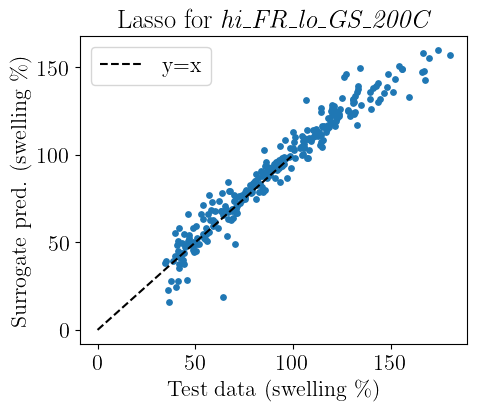

 coeffs:  [ 28.5293515   -8.99971456 -11.57001055] 
 intercept:  40.80333280551052
 R2:  0.9363494332105669 
 RMSE:  2.5337404043169 
 MAE:  2.0295424076272552


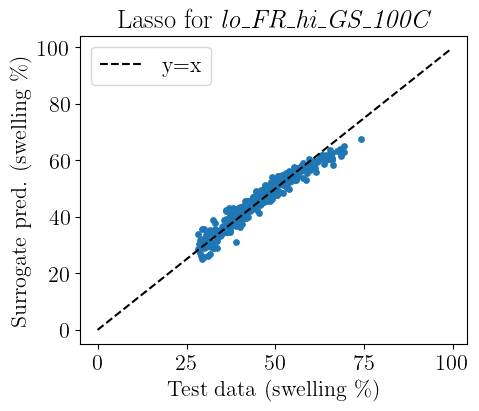

 coeffs:  [ 35.96189985 -12.13906009 -13.11788552] 
 intercept:  52.174484400689245
 R2:  0.96138516374093 
 RMSE:  2.3154796215289326 
 MAE:  1.71088051117285


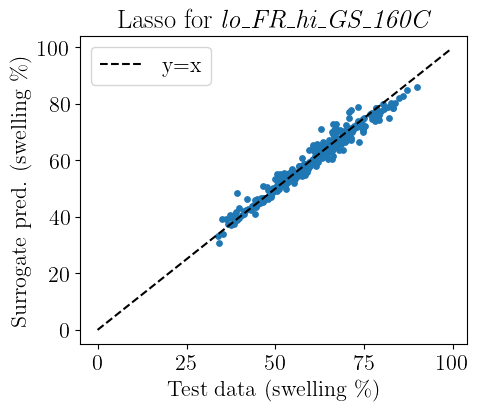

 coeffs:  [ 43.71545859 -15.11703343 -18.85419661] 
 intercept:  46.28648342081522
 R2:  0.9049091599641694 
 RMSE:  4.675756424336925 
 MAE:  3.6188557869605433


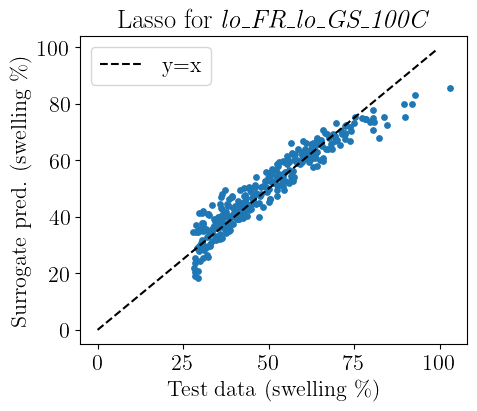

 coeffs:  [ 72.06941207 -25.48546536 -27.00935508] 
 intercept:  65.32210035749571
 R2:  0.9439460235335793 
 RMSE:  5.815376810129703 
 MAE:  4.423929194884405


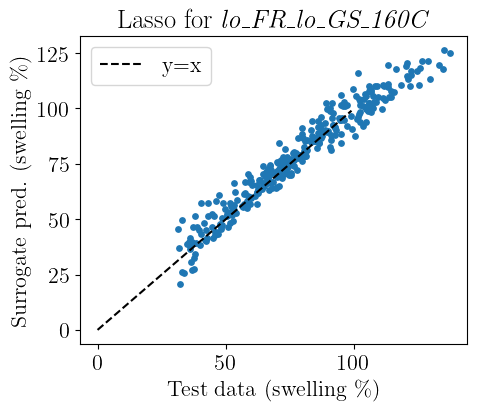

In [10]:
for f in data_files:
    X_train, X_test, y_train, y_test = load_data(f)
    
    reg_lin = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
    
    lin_coef_cept(reg_lin)
    mod_metrics(reg_lin, X_test, y_test)
    pred_vs_actual(reg_lin, X_test, y_test, r'Lasso for \textit{' + f[8:-4] + '}')

# NN

In [11]:
from sklearn.neural_network import MLPRegressor

 R2:  0.9585334326344143 
 RMSE:  2.509814006264039 
 MAE:  1.8542505565992529


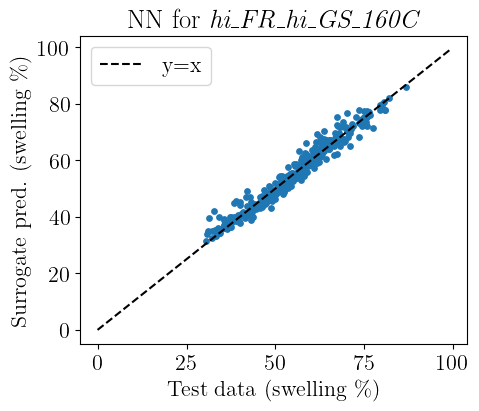

 R2:  0.9676796616570076 
 RMSE:  2.5732972997668635 
 MAE:  1.9888651497097554


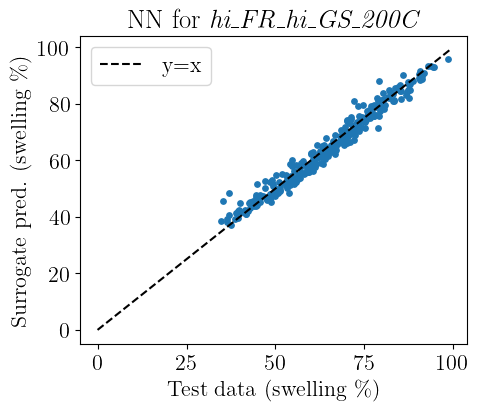

 R2:  0.9495614455687781 
 RMSE:  5.795518938336675 
 MAE:  4.3603516047376605


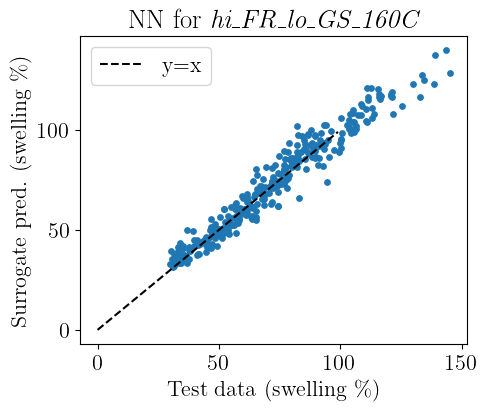

 R2:  0.9661319605238122 
 RMSE:  6.124925811233835 
 MAE:  4.169803088677446


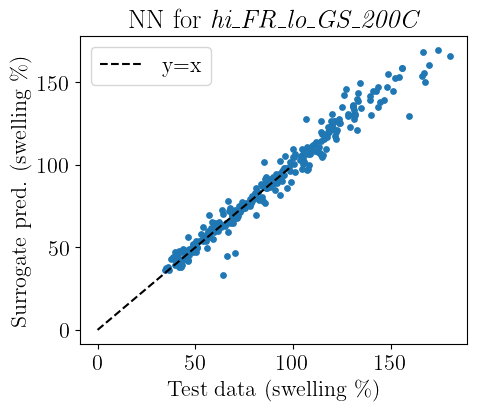

 R2:  0.9561982022788054 
 RMSE:  2.1018753015053884 
 MAE:  1.667393562706674


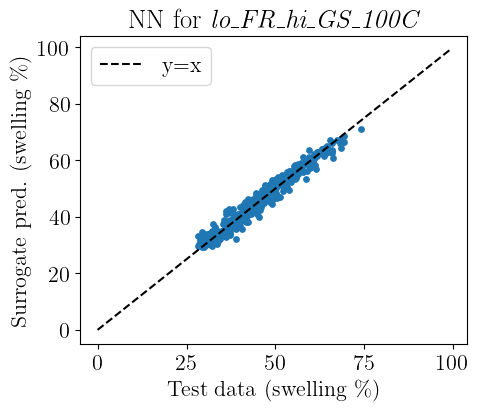

 R2:  0.9633486581901278 
 RMSE:  2.255842651959044 
 MAE:  1.7130203748478574


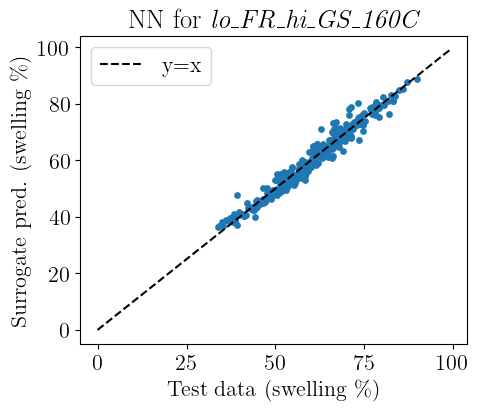

 R2:  0.9408770322906997 
 RMSE:  3.686893986648799 
 MAE:  2.9009499340228615


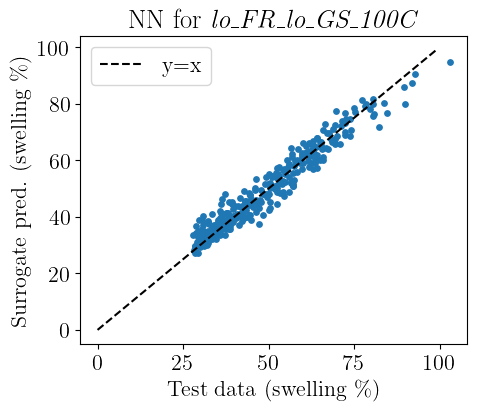

 R2:  0.9552374508418459 
 RMSE:  5.19675272374412 
 MAE:  3.8763148660610023


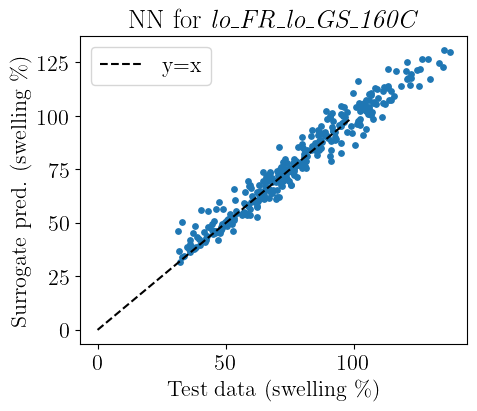

In [12]:
regs_nn = []

for f in data_files:
    X_train, X_test, y_train, y_test = load_data(f)
    
    reg_nn = MLPRegressor(
        hidden_layer_sizes=(50, 50, 50, 50),
        alpha=0,
        random_state=37,
        max_iter=5000,
        tol=0.1
    ).fit(X_train, y_train)

    mod_metrics(reg_nn, X_test, y_test)
    pred_vs_actual(reg_nn, X_test, y_test, r'NN for \textit{' + f[8:-4] + '}')

    regs_nn.append(reg_nn)

In [13]:
import pickle

with open('nn_surrogates.pkl', 'wb') as f:
    pickle.dump(regs_nn, f)

# SVR

In [14]:
from sklearn.svm import SVR

 R2:  0.9641134389419841 
 RMSE:  2.3348469470308673 
 MAE:  1.6539096093598158


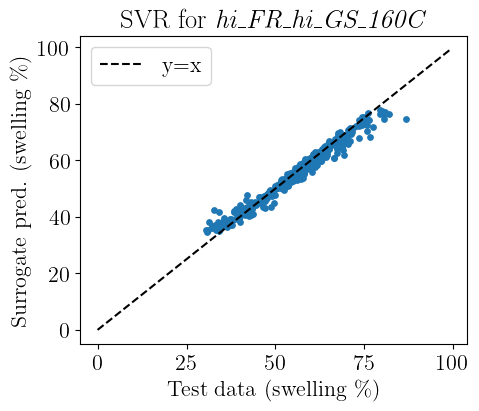

 R2:  0.9643652574845639 
 RMSE:  2.702021669168118 
 MAE:  1.920789047358636


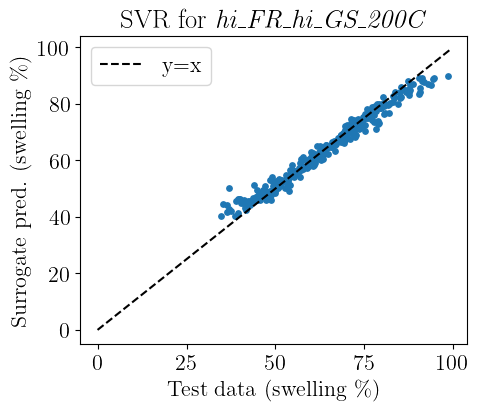

 R2:  0.9202678887151801 
 RMSE:  7.286645575943198 
 MAE:  5.1588827600599


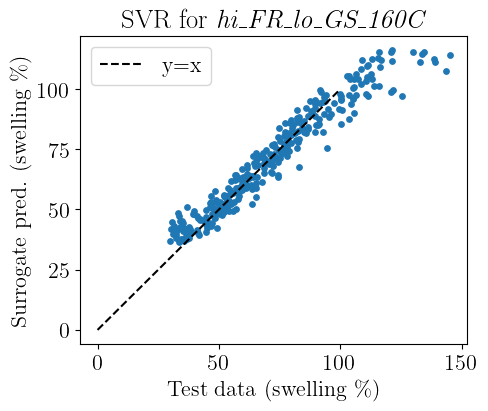

 R2:  0.9040318305680336 
 RMSE:  10.310255064589656 
 MAE:  7.14247958172518


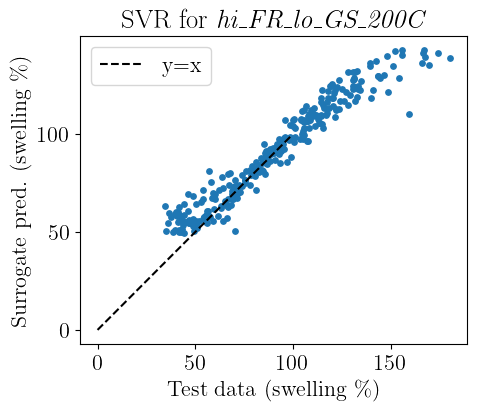

 R2:  0.9519902601434449 
 RMSE:  2.200521700312995 
 MAE:  1.6534183220237182


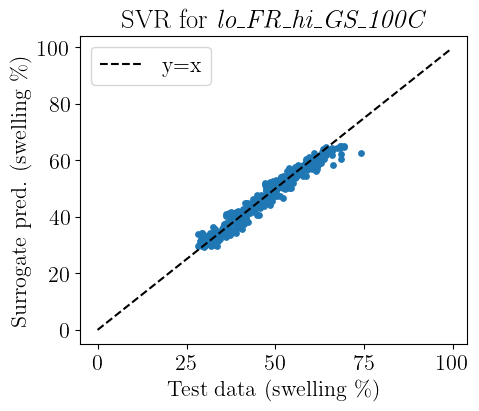

 R2:  0.9645398486143146 
 RMSE:  2.2188817440712665 
 MAE:  1.4980734711445325


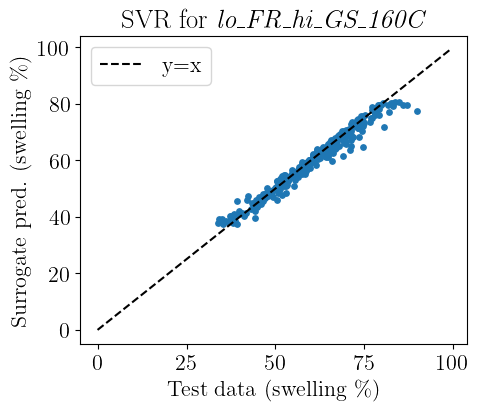

 R2:  0.9212895195807955 
 RMSE:  4.254013059617733 
 MAE:  3.1264332522370437


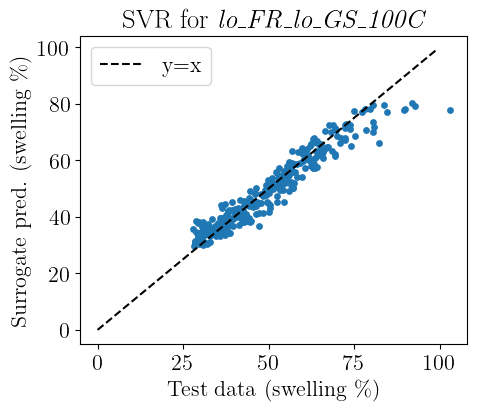

 R2:  0.9257816507158592 
 RMSE:  6.691604927354086 
 MAE:  4.9014139115370075


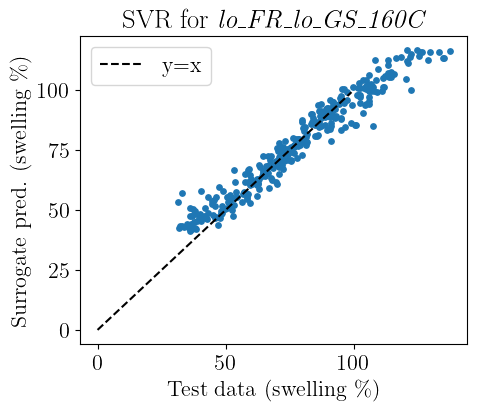

In [15]:
for f in data_files:
    X_train, X_test, y_train, y_test = load_data(f)
    
    reg_svr = SVR(kernel='rbf').fit(X_train, y_train)
    
    mod_metrics(reg_svr, X_test, y_test)
    pred_vs_actual(reg_svr, X_test, y_test, r'SVR for \textit{' + f[8:-4] + '}')

# GP

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF

(233, 3)
DotProduct(sigma_0=3.37e+04)
 R2:  0.9533386604063964 
 RMSE:  2.6623864674184246 
 MAE:  1.9898311442900063


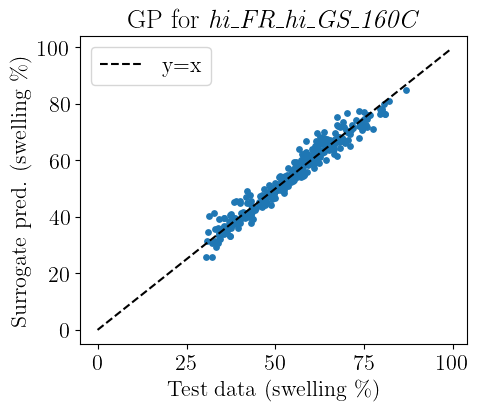

(204, 3)
DotProduct(sigma_0=3.37e+04)
 R2:  0.9617440276267788 
 RMSE:  2.799636439748185 
 MAE:  2.1262753839590443


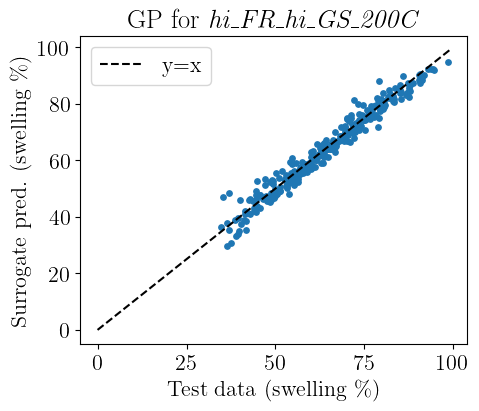

(220, 3)
DotProduct(sigma_0=3.37e+04)
 R2:  0.9283823927137566 
 RMSE:  6.9059100510466624 
 MAE:  5.22242123015873


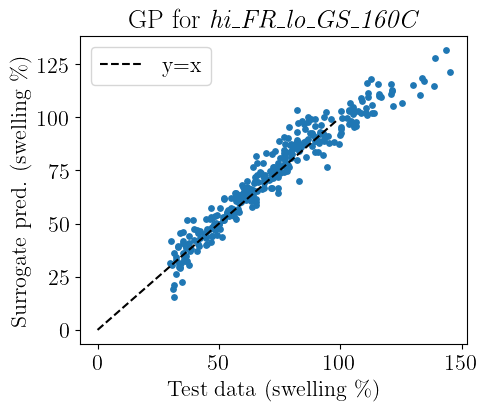

(197, 3)
DotProduct(sigma_0=1.95e+05)
 R2:  0.9356465937801924 
 RMSE:  8.442898601943343 
 MAE:  6.038105997957805


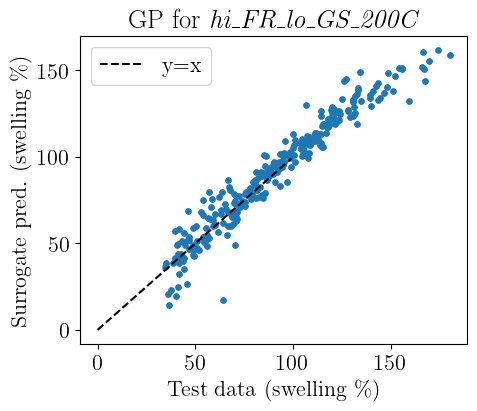

(257, 3)
DotProduct(sigma_0=40.1)
 R2:  0.9362156901857983 
 RMSE:  2.5364009641550647 
 MAE:  2.042801170584259


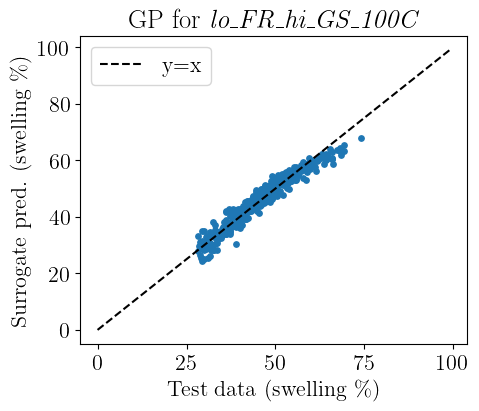

(219, 3)
DotProduct(sigma_0=53.6)
 R2:  0.9640022160183493 
 RMSE:  2.2356393625706623 
 MAE:  1.661869389566661


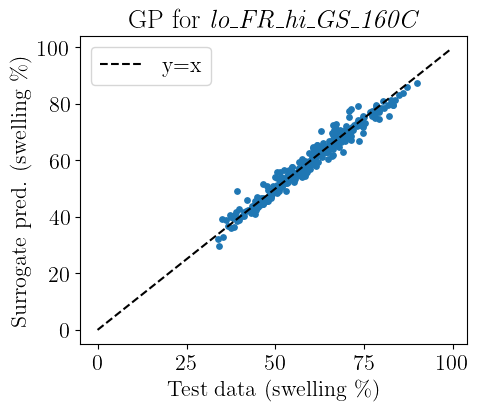

(214, 3)
DotProduct(sigma_0=3.37e+04)
 R2:  0.9051861416137695 
 RMSE:  4.668941660698508 
 MAE:  3.686398488395766


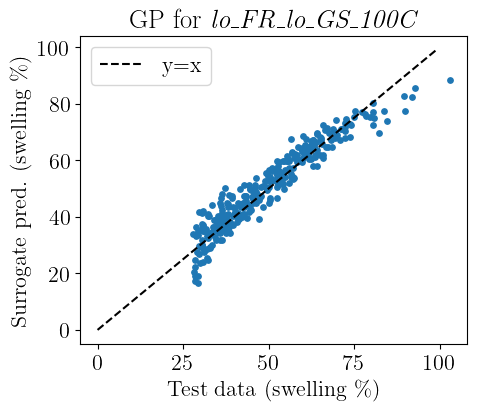

(223, 3)
DotProduct(sigma_0=1.19e+05)
 R2:  0.9429519783790258 
 RMSE:  5.866714322035243 
 MAE:  4.535835815047022


/home/atom/research/wd-swelling/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 2 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


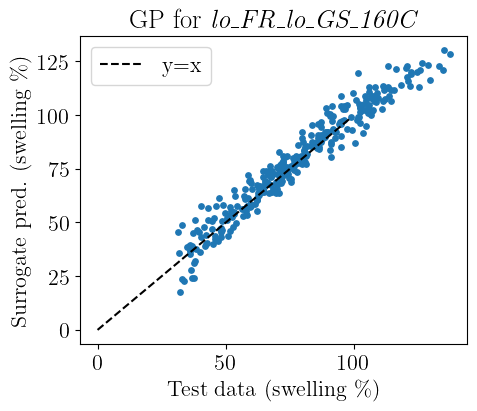

In [17]:
for f in data_files:
    X_train, X_test, y_train, y_test = load_data(f)
    
    tX_train, _, ty_train, _ = train_test_split(
        X_train, y_train, test_size=0.7, random_state=17
    )
    print(tX_train.shape)

    kern = DotProduct(sigma_0_bounds=(1e-5, 1e6))
    reg_gp = GaussianProcessRegressor(
        kernel=kern,
        alpha=1e-3,
        n_restarts_optimizer=9,
        random_state=42
    )
    reg_gp.fit(tX_train, ty_train)
    print(reg_gp.kernel_)

    mod_metrics(reg_gp, X_test, y_test)
    pred_vs_actual(reg_gp, X_test, y_test, r'GP for \textit{' + f[8:-4] + '}')